# Random NN modes

This tutorial shows how to build neuron network models.
At end, will calculate compositional descriptors using `xenonpy.descriptor.Compositions` calculator and train our model using `xenonpy.model.training` modules.

In this tutorial, we will use some inorganic sample data from materials project. 
If you don't have it, please see https://github.com/yoshida-lab/XenonPy/blob/master/samples/build_sample_data.ipynb.

#### useful functions

Run this cell will load some well-used packages such as `numpy`, `pandas`, and so on.
The running will also import some valuable functions which are written by ourselves.
There is no magic,  see `samples/tools.ipynb` to know what will be imported.

In [1]:
%run tools.ipynb

## Sequential linear model

We will use `xenonpy.model.SequentialLinear` to build a sequential linear model. The basic layer in `SequentialLinear` model is `xenonpy.model.LinearLayer`

In [2]:
from xenonpy.model import SequentialLinear, LinearLayer
SequentialLinear?

Init signature:
SequentialLinear(
    in_features: int,
    out_features: int,
    bias: bool = True,
    *,
    h_neurons: Union[Tuple[float, ...], Tuple[int, ...]] = (),
    h_bias: Union[bool, Tuple[bool, ...]] = True,
    h_dropouts: Union[float, Tuple[float, ...]] = 0.1,
    h_normalizers: Union[float, NoneType, Tuple[Union[float, NoneType], ...]] = 0.1,
    h_activation_funcs: Union[Callable, NoneType, Tuple[Union[Callable, NoneType], ...]] = ReLU(),
)
Docstring:     
Sequential model with linear layers and configurable other hype-parameters.
e.g. ``dropout``, ``hidden layers``
Init docstring:
Parameters
----------
in_features
    Size of input.
out_features
    Size of output.
bias
    Enable ``bias`` in input layer.
h_neurons
    Number of neurons in hidden layers.
    Can be a tuple of floats. In that case,
    all these numbers will be used to calculate the neuron numbers.
    e.g. (0.5, 0.4, ...) will be expanded as (in_features * 0.5, in_features * 0.4, ...)
h_bias
    ``bi

In [3]:
LinearLayer?

Init signature:
LinearLayer(
    in_features: int,
    out_features: int,
    bias: bool = True,
    *,
    dropout: float = 0.0,
    activation_func: Callable = ReLU(),
    normalizer: Union[float, NoneType] = 0.1,
)
Docstring:     
Base NN layer. This is a wrap around PyTorch.
See here for details: http://pytorch.org/docs/master/nn.html#
Init docstring:
Parameters
----------
in_features:
    Size of each input sample.
out_features:
    Size of each output sample
dropout: float
    Probability of an element to be zeroed. Default: 0.5
activation_func: func
    Activation function.
normalizer: func
    Normalization layers
File:           ~/projects/XenonPy/xenonpy/model/sequential.py
Type:           type
Subclasses:     


As above, we follow the official suggestion, `SequentialLinear` is a python class that inherit the `torch.nn.Module` class. 
Users can specify the hyperparameters to instantiate a fully customed model object. For example:

In [4]:
model = SequentialLinear(290, 1, h_neurons=(0.8, 0.7, 0.6))
model

SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=232, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(232, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=232, out_features=203, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(203, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=203, out_features=174, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(174, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=174, out_features=1, bias=True)
)

#### fully randomized model generation

The randomly model generating can be easily illustrated as follow:

1. using a random parameter generator to generate a parammeter set.
2. using the generated parameter set to instantiate the model object.
3. loop 1 and 2 as many times as needed.

We provided a general parameter generator `xenonpy.utils.ParameterGenerator`  to do all the 3 steps for any callable object.

In [5]:
from xenonpy.utils import ParameterGenerator
ParameterGenerator?

Init signature:
ParameterGenerator(
    seed: Union[int, NoneType] = None,
    **kwargs: Union[Any, Sequence, Callable, Dict],
)
Docstring:      Generator for parameter set generating.
Init docstring:
Parameters
----------
seed
    Numpy random seed.
kwargs
    Parameter candidate.
File:           ~/projects/XenonPy/xenonpy/utils/parameter_gen.py
Type:           type
Subclasses:     


Call a instance of `ParameterGenerator` will return a generator.
This generator can randomly selected parameters from parameter candidate and yield them as a dict.
 This is what we want in step 1.

In [6]:
from math import ceil
from random import uniform

generator = ParameterGenerator(
    in_features=290,
    out_features=1,
    h_neurons=dict(
        data=[ceil(uniform(0.1, 1.2) * 290) for _ in range(100)], 
        repeat=(2, 3)
    )
)

Because `generator` is a generator, `for ... in ...` statement can be applied. 
For example, using `for parameters in generator(num_of_models)` to loop all these generated parameter sets.

In [7]:
for parameters in generator(num=10):
    print(parameters)

{'in_features': 290, 'out_features': 1, 'h_neurons': (293, 30, 69)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (105, 282)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (261, 323)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (62, 90, 176)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (30, 56, 296)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (219, 343, 243)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (73, 212, 33)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (255, 45)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (330, 53, 73)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (323, 211, 105)}


To facilitate step 2, we can give a model class to the `factory` parameter as a factory function.
If `factory` parameter is given, generator will feed generated parameters to the factory function automatically and yield the result as the second return in each loop. For example:

In [8]:
for parameters, model in generator(2, factory=SequentialLinear):
    print('parameters: ', parameters)
    print(model, '\n')

parameters:  {'in_features': 290, 'out_features': 1, 'h_neurons': (252, 30, 278)}
SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=252, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(252, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=252, out_features=30, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(30, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=30, out_features=278, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(278, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=278, out_features=1, bias=True)
) 

parameters:  {'in_features': 290, 'out_features': 1, 'h_neurons': (108, 216, 264)}
Sequen

### scheduled random model

We also enable users to generate parameters in a functional way by given a function as candidate parameters. In this case, the function accept a int number as vector length and a vector as generated parameters. For example, generate a `n` length vector with float numbers sorted in ascending.

In [9]:
generator = ParameterGenerator(
    in_features=290,
    out_features=1,
    h_neurons=dict(
        data=lambda n: sorted(np.random.uniform(0.2, 0.8, size=n), reverse=True), 
        repeat=(2, 3)
    )
)

In [10]:
for parameters, model in generator(2, factory=SequentialLinear):
    print('parameters: ', parameters)
    print(model, '\n')

parameters:  {'in_features': 290, 'out_features': 1, 'h_neurons': (0.6684651593904967, 0.5095143148726551)}
SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=194, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(194, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=194, out_features=148, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(148, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=148, out_features=1, bias=True)
) 

parameters:  {'in_features': 290, 'out_features': 1, 'h_neurons': (0.7631917887853041, 0.5073996406287665, 0.48229709051780945)}
SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=222, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(222, eps=

## modle training

We provide the general and extendable model training system for neuron network model training.
By customs the extensions, users can fully control their model training process, and save the training results follow the *XenonPy.MDL* format automatically.

All these modules and extensions are under the `xenonpy.model.training`.

In [11]:
import torch
import matplotlib.pyplot as plt
from pymatgen import Structure

from xenonpy.model.training import Trainer, SGD, MSELoss, Adam, ReduceLROnPlateau, ExponentialLR, ClipValue

from xenonpy.datatools import preset, Splitter
from xenonpy.descriptor import Compositions

### prepare training/testing data

If you followed the tutorial in https://github.com/yoshida-lab/XenonPy/blob/master/samples/build_sample_data.ipynb,
the sample data should be save at `~/.xenonpy/userdata` with name `mp_samples.pd.xz`.
You can use `pd.read_pickle` to load this file but we suggest that you use our `xenonpy.datatools.preset` module.

We chose `volume` as the example to demostrate how to use our training system. We only use the data which `volume` are smaller than 2,500 to avoid the disparate data.
we select data in `pandas.DataFrame` and calculate the descriptors using `xenonpy.descriptor.Compositions` calculator.
It is noticed that the input for a neuron network model in pytorch must has shape (N x M x ...), which mean if the input is a 1-D vector, it should be reshaped to 2-D, e.g. (N) -> (N x 1).

In [12]:
# if you have not have the samples data
# preset.build('mp_samples', api_key=<your materials project api key>)

from xenonpy.datatools import preset

data = preset.mp_samples
data.head(3)

,band_gap,composition,density,e_above_hull,efermi,elements,final_energy_per_atom,formation_energy_per_atom,pretty_formula,structure,volume
mp-1008807,0.0000,"{'Rb': 1.0, 'Cu': 1.0, 'O': 1.0}",4.784634,0.996372,1.100617,"[Rb, Cu, O]",-3.302762,-0.186408,RbCuO,"[[-3.05935361 -3.05935361 -3.05935361] Rb, [0....",57.268924
mp-1009640,0.0000,"{'Pr': 1.0, 'N': 1.0}",8.145777,0.759393,5.213442,"[Pr, N]",-7.082624,-0.714336,PrN,"[[0. 0. 0.] Pr, [1.57925232 1.57925232 1.58276...",31.579717
mp-1016825,0.7745,"{'Hf': 1.0, 'Mg': 1.0, 'O': 3.0}",6.165888,0.589550,2.424570,"[Hf, Mg, O]",-7.911723,-3.060060,HfMgO3,"[[2.03622802 2.03622802 2.03622802] Hf, [0. 0....",67.541269


In [13]:
prop = data[data.volume <= 2500]['volume'].to_frame()  # reshape to 2-D
desc = Compositions(featurizers='classic').transform(data.loc[prop.index]['composition'])

desc.head(3)
prop.head(3)

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
mp-1008807,24.666667,174.067140,209.333333,25.666667,55.004267,1297.063333,72.868680,1646.90,139.333333,128.333333,...,1.0,2.0,0.360,0.02658,152.0,150.0,182.0,349.5,317.5,0.802
mp-1009640,33.000000,137.000000,232.500000,19.050000,77.457330,1931.200000,43.182441,1892.85,137.000000,123.500000,...,2.0,2.0,0.192,0.02583,155.0,166.0,193.0,360.6,333.6,1.100
mp-1016825,21.600000,153.120852,203.400000,13.920000,50.158400,1420.714000,76.663625,343.82,102.800000,96.000000,...,2.0,2.0,0.146,0.02658,152.0,150.0,182.0,302.1,317.5,0.802


,volume
mp-1008807,57.268924
mp-1009640,31.579717
mp-1016825,67.541269


Use the `xenonpy.datatools.Splitter` to split data into trainging and testing.

In [14]:
Splitter?

Init signature:
Splitter(
    size: int,
    *,
    test_size: Union[float, int] = 0.2,
    k_fold: Union[int, Iterable, NoneType] = None,
    random_state: Union[int, NoneType] = None,
    shuffle: bool = True,
)
Docstring:      Data splitter for train and test
Init docstring:
Parameters
----------
size
    Total sample size.
    All data must have same length of their first dim,
test_size
    If float, should be between ``0.0`` and ``1.0`` and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. Can be ``0`` if cv is ``None``.
    In this case, :meth:`~Splitter.cv` will yield a tuple only contains ``training`` and ``validation``
    on each step. By default, the value is set to 0.2.
k_fold
    Number of k-folds.
    If ``int``, Must be at least 2.
    If ``Iterable``, it should provide label for each element which will be used for group cv.
    In this case, the input of :meth:`~Splitter.cv` must be a :c

In [15]:
sp = Splitter(prop.shape[0])
x_train, x_val, y_train, y_val = sp.split(desc, prop)

x_train.shape
y_train.shape
x_val.shape
y_val.shape

(738, 290)

(738, 1)

(185, 290)

(185, 1)

### model training

Model training in pytorch is very flex.
The [official document](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) explains the concept with examples.
In short, train a neuron network model is as follows:
1. calculate loss of training data for the model.
2. do the backpropagation to update the weights between each neuron.
3. loop 1 and 2 until convergence.

In step 1, a calculator which is often called `loss function` is needed to calculate the loss;
In step 2, an optimizer will be used.
`xenonpy.model.training.Trainer` works as step 3.

The simplest usage is following:

In [16]:
model = SequentialLinear(290, 1, h_neurons=(0.8, 0.6, 0.4, 0.2))
model

SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=232, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(232, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=232, out_features=174, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(174, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=174, out_features=116, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(116, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_3): LinearLayer(
    (linear): Linear(in_features=116, out_features=58, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(58, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation):

In [17]:
trainer = Trainer(
    model=model,
    optimizer=Adam(lr=0.01),
    loss_func=MSELoss()
)
trainer

Trainer(clip_grad=None, cuda=None, epochs=200, loss_func=MSELoss(),
        lr_scheduler=None,
        model=SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=232, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(232, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Li...
    (linear): Linear(in_features=116, out_features=58, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(58, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=58, out_features=1, bias=True)
),
        non_blocking=False,
        optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
))

In [18]:
trainer.fit(
    x_train=torch.tensor(x_train.values, dtype=torch.float),
    y_train=torch.tensor(y_train.values, dtype=torch.float),
    epochs=400
)

Training: 100%|██████████| 400/400 [00:08<00:00, 45.84it/s]


,total_iters,i_epoch,i_batch,train_mse_loss
397,397,398,1,3057.736328
398,398,399,1,2771.815674
399,399,400,1,2907.369873


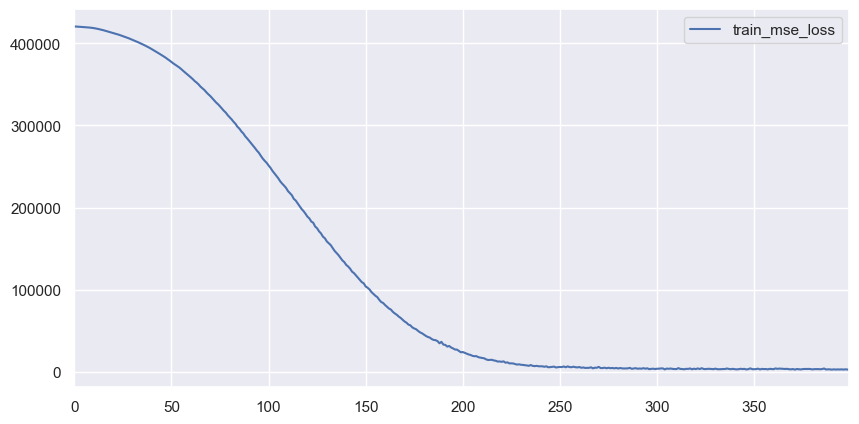

In [19]:
_, ax = plt.subplots(figsize=(10, 5), dpi=100)
trainer.training_info.tail(3)
trainer.training_info.plot(y=['train_mse_loss'], ax=ax)

Missing directory and/or file name information!


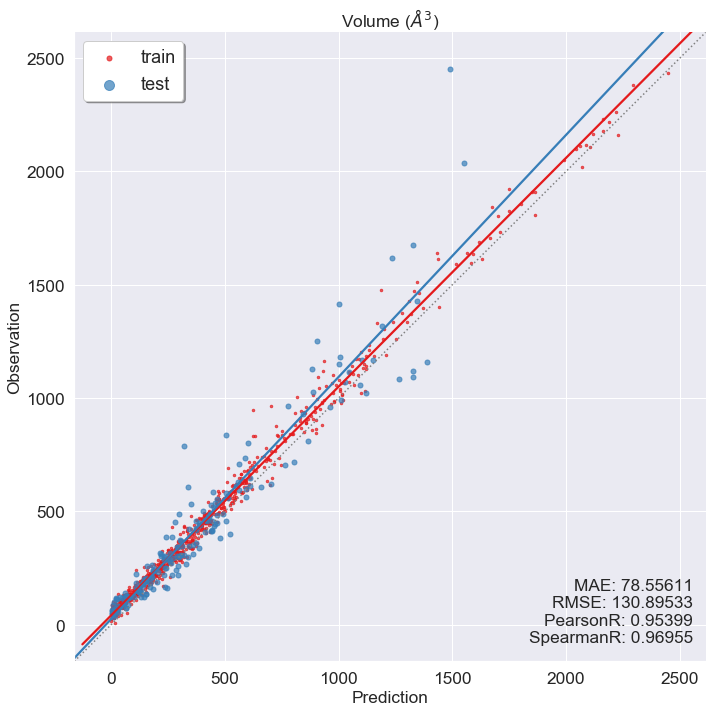

In [20]:
y_pred = trainer.predict(x_in=torch.tensor(x_val.values, dtype=torch.float)).detach().numpy().flatten()
y_true = y_val.values.flatten()

y_fit_pred = trainer.predict(x_in=torch.tensor(x_train.values, dtype=torch.float)).detach().numpy().flatten()
y_fit_true = y_train.values.flatten()

draw(y_true, y_pred, y_fit_true, y_fit_pred, prop_name='Volume ($\AA^3$)')

You can see that although `trainer` can keep training info automatically for us, but we still need to convert `DataFrame` to `torch.Tensor` and convert dtype from `np.double` to `torch.float` in training and convert them back in prediction ourself. Also, from the **prediction vs observation** graph, the overfitting can be observated. This is caused by using all training data in same order for each epoch in training loop. We can use mini-batch to add frustration to avoid overfitting but do this will import more boilerplate codes.

To hidden these boilerplate codes to only foucs on the training itself, we provide extension system.

First, we use `ArrayDataset` to wrap our data, and use `torch.utils.data.DataLoader` to a build mini-batch loader.

In [21]:
from xenonpy.model.training.dataset import ArrayDataset
from torch.utils.data import DataLoader

In [22]:
train_dataset = DataLoader(ArrayDataset(x_train, y_train), shuffle=True, batch_size=100)
val_dataset = DataLoader(ArrayDataset(x_val, y_val), batch_size=1000)

Second, use `TensorConverter` extension to auto-convert data between `numpy` and `torch.Tensor`.
Additionally, we want to trace some criteria and use early stopping when these criteria never go better.
This can be done by using `Validator`.

Last, we want save our model for latter using. Just add `Persist` to the trainer and saving will be done in slient.

In [23]:
from xenonpy.model.training.extension import Validator, TensorConverter, Persist
from xenonpy.model.training.dataset import ArrayDataset
from xenonpy.model.utils import regression_metrics

use `trainer.extend` method to add extension. It is noticed that extension will be executed as their adding order, so `TensorConverter` should always be the first and `Persist` is the last.

In [24]:
trainer = Trainer(
    optimizer=Adam(lr=0.01),
    loss_func=MSELoss(),
).extend(
    TensorConverter(),
    Validator(metrics_func=regression_metrics, early_stopping=30, trace_order=5, mae=0.0, pearsonr=1.0),
)

In [25]:
Persist?

Init signature:
Persist(
    path: Union[pathlib.Path, str] = '.',
    *,
    model_class: Callable = None,
    model_params: Union[tuple, dict, <built-in function any>] = None,
    increment=False,
    sync_training_step=False,
    **describe: Any,
)
Docstring:      Trainer extension for data persistence
Init docstring:
Parameters
----------
path
    Path for model saving.
model_class
    A factory function for model reconstructing.
    In most case this is the model class inherits from :class:`torch.nn.Module`
model_params
    The parameters for model reconstructing.
    This can be anything but in general this is a dict which can be used as kwargs parameters.
increment
    If ``True``, dir name of path will be decorated with a auto increment number,
    e.g. use ``model_dir@1`` for ``model_dir``.
sync_training_step
    If ``True``, will save ``trainer.training_info`` at each iteration.
    Default is ``False``, only save ``trainer.training_info`` at each epoch.
describe:
    Any oth

`Persist` need a path to save model. For convenience, we calculate the path name by concatenating the number of neurons in a model.

In [26]:
def make_name(model):
    name = []
    for n, m in model.named_children():
        if 'layer_' in n:
            name.append(str(m.linear.in_features))
        else:
            name.append(str(m.in_features))
            name.append(str(m.out_features))
    return '-'.join(name)

In [27]:
model = SequentialLinear(290, 1, h_neurons=(0.8, 0.6, 0.4, 0.2))
model

model_name = make_name(model)
persist = Persist(
    f'trained_models/{model_name}', 
    # -^- required -^-

    # -v- optional -v-
    increment=False, 
    sync_training_step=True,
    author='Chang Liu',
    email='liu.chang.1865@gmail.com',
    dataset='materials project',
)
_ = trainer.extend(persist)
trainer.reset(to=model)

trainer.fit(training_dataset=train_dataset, validation_dataset=val_dataset, epochs=400)
persist(splitter=sp, data_indices=prop.index.tolist())  # <-- calling of this method only after the model training

SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=232, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(232, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=232, out_features=174, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(174, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=174, out_features=116, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(116, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_3): LinearLayer(
    (linear): Linear(in_features=116, out_features=58, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(58, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation):

Training:   3%|▎         | 65/2000 [00:26<14:30,  2.22it/s]

Early stopping is applied: no improvement for ['mae', 'pearsonr'] since the last 31 iterations, finish training at iteration 518


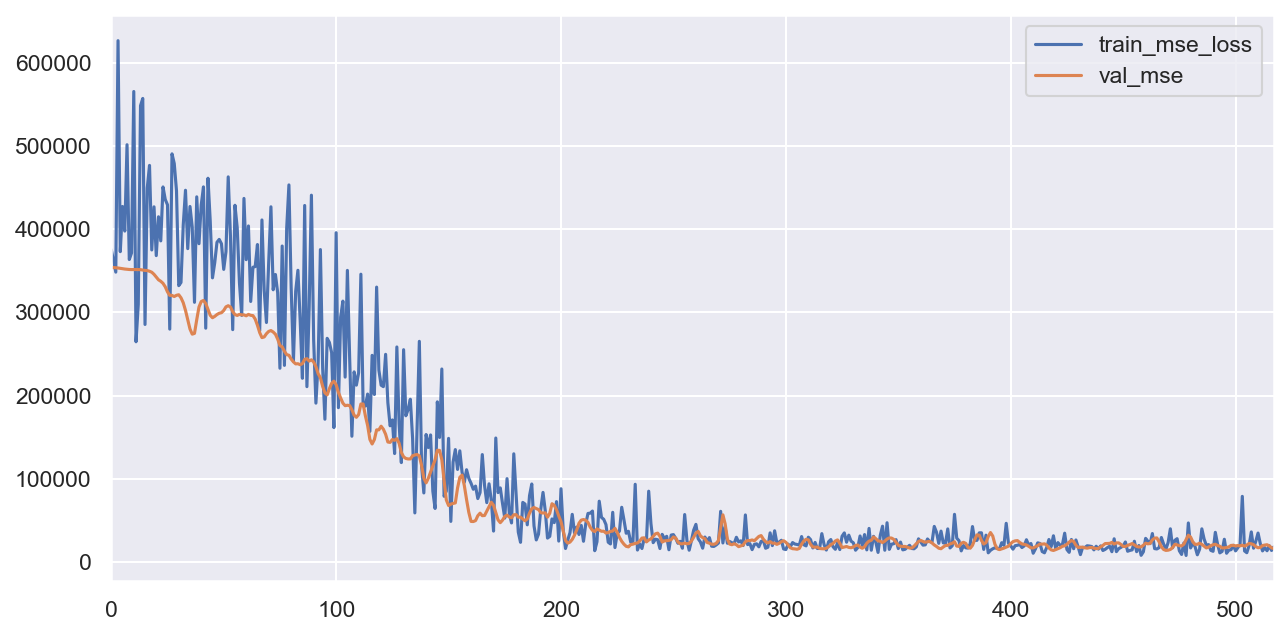

In [28]:
_, ax = plt.subplots(figsize=(10, 5), dpi=150)
trainer.training_info.plot(y=['train_mse_loss', 'val_mse'], ax=ax)

Missing directory and/or file name information!


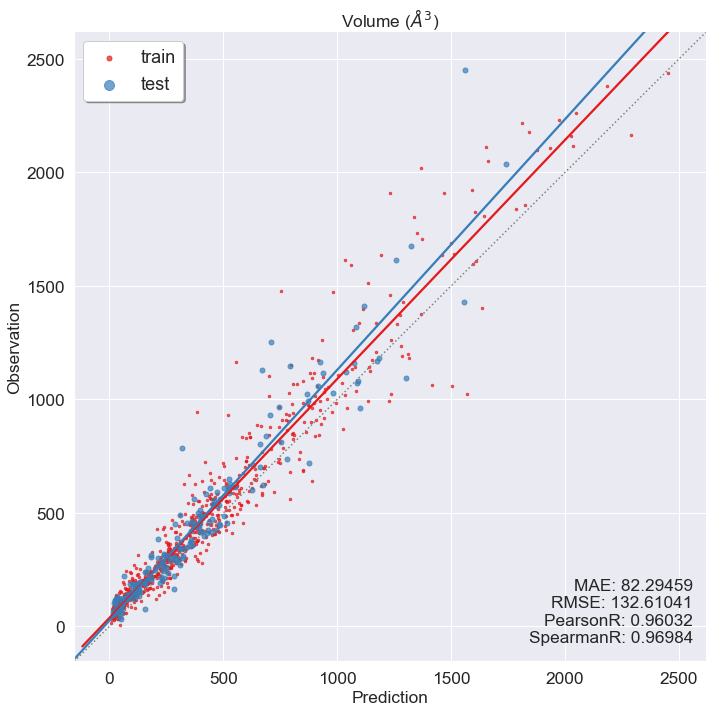

In [29]:
y_pred, y_true = trainer.predict(dataset=val_dataset, checkpoint='pearsonr_1')
y_fit_pred, y_fit_true = trainer.predict(dataset=train_dataset, checkpoint='pearsonr_1')
draw(y_true, y_pred, y_fit_true, y_fit_pred, prop_name='Volume ($\AA^3$)')

## Combine the random model generating and training

In [30]:
generator = ParameterGenerator(
    in_features=290,
    out_features=1,
    h_neurons=dict(
        data=lambda n: sorted(np.random.uniform(0.2, 0.8, size=n), reverse=True), 
        repeat=(3, 4)
    )
)

In [31]:
for paras, model in generator(num=2, factory=SequentialLinear):
    print(model)
    model_name = make_name(model)
    persist = Persist(
        f'trained_models/{model_name}', 
        # -^- required -^-
        
        # -v- optional -v-
        increment=False, 
        sync_training_step=True,
        model_class=SequentialLinear,
        model_params=paras,
        author='Chang Liu',
        email='liu.chang.1865@gmail.com',
        dataset='materials project',
    )
    _ = trainer.extend(persist)
    trainer.reset(to=model)
    
    trainer.fit(training_dataset=train_dataset, validation_dataset=val_dataset, epochs=400)
    persist(splitter=sp, data_indices=prop.index.tolist())  # <-- calling of this method only after the model training

Training:   0%|          | 0/2000 [00:00<?, ?it/s]

SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=208, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(208, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=208, out_features=148, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(148, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=148, out_features=106, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(106, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=106, out_features=1, bias=True)
)


Training:   0%|          | 0/2000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['mae', 'pearsonr'] since the last 31 iterations, finish training at iteration 407
SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=145, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(145, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=145, out_features=116, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(116, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=116, out_features=98, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(98, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=98, out_features=1, bias=True)
)


Training:   3%|▎         | 61/2000 [00:20<11:41,  2.77it/s]

Early stopping is applied: no improvement for ['mae', 'pearsonr'] since the last 31 iterations, finish training at iteration 484
